# Regression Logistique 

Dans ce notebook, nous testons les Regression Logistique avec et sans regularisation. Nous faisons ensuite une recherche d'hyperparametres et des comparaisons de résultats.

In [1]:
#!python ../lib/lib_install.py

In [2]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, data_exploring.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *
from src.model_evaluation import *
from src.model_training import *

# Import the data
from data.data_extract import load_data

Everything imported successfully.


In [3]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df = df_data.copy()

# Pretraitement

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:

df = preprocess(df)
df.head()


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Now Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married,Prof-specialty,Married,Black,Female,0,0,40,Other,0


In [7]:
df.shape

(48544, 14)

In [8]:
## calcul de duplication
df.duplicated().sum()

0

In [9]:
df_train, df_test = seperate_train_test(df, random_state=42)

In [10]:
cat_features = get_cat_features(df)
cont_features = get_cont_features(df)

In [11]:
cont_features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [12]:
cat_features

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [13]:
df_train,df_test =impute_missing_cat_values(df_train, df_test,cat_features,strategy='most_frequent')


In [14]:
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
20628,25,Private,197303,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,0
34928,32,Self-emp,158603,11,Never-married,Sales,Unmarried,White,Female,0,0,7,United-States,0
18703,73,Federal-gov,127858,10,Now Single,Tech-support,Not-in-family,White,Female,3273,0,40,United-States,0
26780,42,Self-emp,78765,10,Now Single,Exec-managerial,Unmarried,White,Male,0,0,90,United-States,1
38471,35,Self-emp,190759,10,Now Single,Craft-repair,Own-child,White,Male,0,0,40,United-States,0


In [15]:
df_train,df_test = standardize(df_train, df_test, cont_features)

In [16]:
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
20628,-0.993898,Private,0.070748,1.149415,Never-married,Prof-specialty,Own-child,White,Female,-0.231956,-0.218153,-0.031402,United-States,0
34928,-0.484253,Self-emp,-0.295999,0.367959,Never-married,Sales,Unmarried,White,Female,-0.231956,-0.218153,-2.692497,United-States,0
18703,2.500811,Federal-gov,-0.587359,-0.022769,Now Single,Tech-support,Not-in-family,White,Female,1.052857,-0.218153,-0.031402,United-States,0
26780,0.243811,Self-emp,-1.052597,-0.022769,Now Single,Exec-managerial,Unmarried,White,Male,-0.231956,-0.218153,4.000560,United-States,1
38471,-0.265834,Self-emp,0.008732,-0.022769,Now Single,Craft-repair,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States,0


In [17]:
df_train_encoded,df_test_encoded = encode_cat_features_onehot(df_train, df_test, cat_features)

In [18]:
df_train_encoded.shape

(38835, 65)

In [19]:
df_train = df_train_encoded
df_test = df_test_encoded

In [20]:
df_test.shape

(9709, 65)

# Modélisation

In [21]:
df_train_select = df_train.drop('>50K', axis=1)
df_test_select = df_test.drop('>50K', axis=1)
target_train = df_train['>50K']
target_test = df_test['>50K']

In [22]:
X_train = df_train_select.values
X_test = df_test_select.values

y_train = df_train['>50K'].values
y_test = df_test['>50K'].values


## Model 1 : Regression Logistique

In [23]:
logreg = LogisticRegression(penalty=None, tol=10e-6, random_state=7) # tol (hyperparametre) est la tolérance pour l'arrêt de l'optimisation , valeur minimale de la fonction de coût
logregRidge = LogisticRegression(C=0.1, penalty='l2', tol=10e-6, random_state=7) # plus C est bas plus la regularisation est forte.. C est l'inverse de lambda (parametre de régularisation)
logregLasso = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=10e-6, random_state=7)
logregElasticNet = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7, tol=10e-6, random_state=7) # l1_ratio est le ratio de la pénalité L1 dans la pénalité L1 + L2


In [24]:
dict_models = {
    "Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
                }

In [25]:
X_train.shape

(38835, 64)

In [26]:
X_test.shape

(9709, 64)

Regression logistique

Matrice de confusion:
[[6928  494]
 [ 987 1300]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.72      0.57      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.746112 



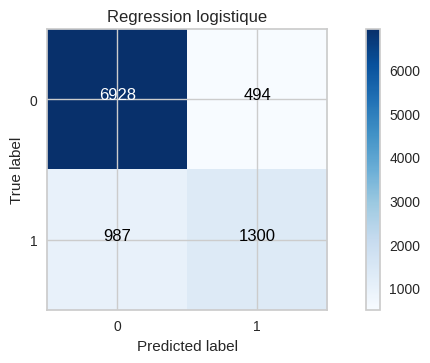

In [27]:
## Régression logistique
# logreg.fit(X_train_up, y_train_up)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, "Regression logistique")

Lasso

Matrice de confusion:
[[6945  477]
 [1009 1278]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7422
           1       0.73      0.56      0.63      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.694613 



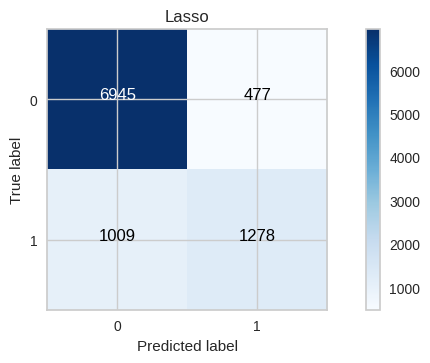

In [28]:
## régression logistique + Lasso
logregLasso.fit(X_train, y_train)
y_pred = logregLasso.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, "Lasso")



elastic_net

Matrice de confusion:
[[6942  480]
 [1000 1287]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7422
           1       0.73      0.56      0.63      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.756412 



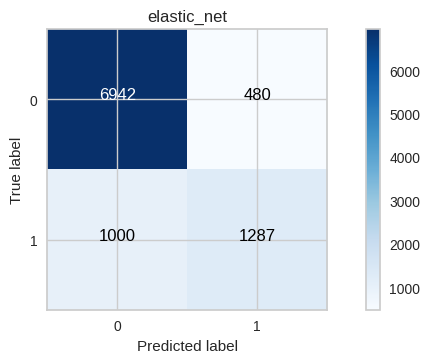

In [29]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train, y_train)
y_pred = logregElasticNet.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, "elastic_net")



# Modélisation prédictive avec  sur-échantillonnage de la classe minoritaire

In [30]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=7)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

Regression Logistique + SMOTE

Matrice de confusion:
[[5929 1493]
 [ 415 1872]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      7422
           1       0.56      0.82      0.66      2287

    accuracy                           0.80      9709
   macro avg       0.75      0.81      0.76      9709
weighted avg       0.85      0.80      0.81      9709
 

Exactitude: 80.348131 



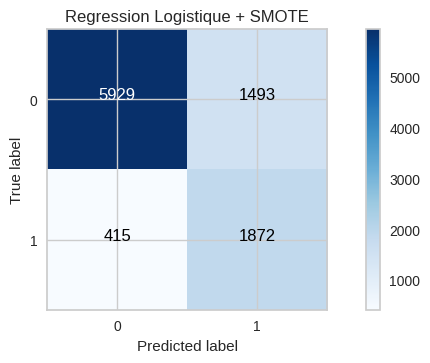

In [31]:
## Régression logistique avec SMOTE
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, "Regression Logistique + SMOTE")

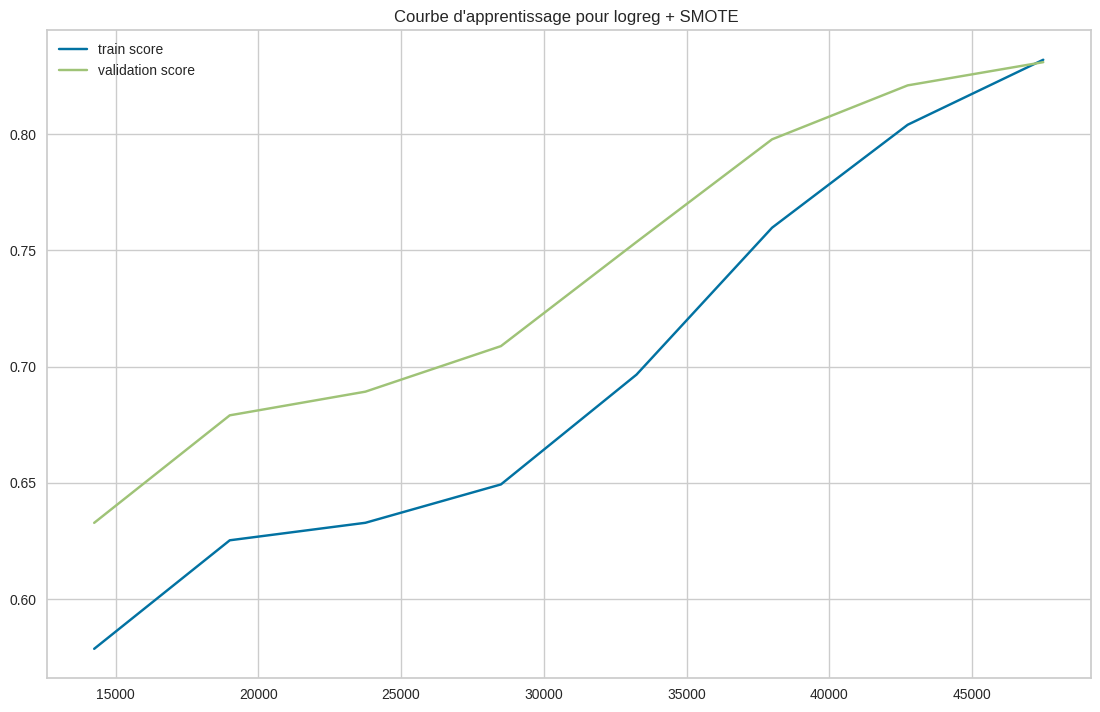

In [32]:
print_courbe_apprentissage(logreg, X_train_up, y_train_up, 'logreg + SMOTE ','f1')

Ridge + SMOTE

Matrice de confusion:
[[5936 1486]
 [ 418 1869]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      7422
           1       0.56      0.82      0.66      2287

    accuracy                           0.80      9709
   macro avg       0.75      0.81      0.76      9709
weighted avg       0.85      0.80      0.81      9709
 

Exactitude: 80.389329 



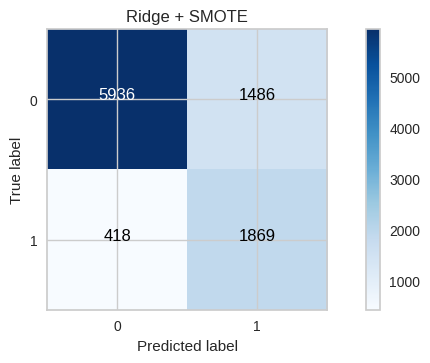

In [33]:
##  ridge + SMOTE
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, 'Ridge + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

Lasso + SMOTE

Matrice de confusion:
[[5929 1493]
 [ 416 1871]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      7422
           1       0.56      0.82      0.66      2287

    accuracy                           0.80      9709
   macro avg       0.75      0.81      0.76      9709
weighted avg       0.85      0.80      0.81      9709
 

Exactitude: 80.337831 



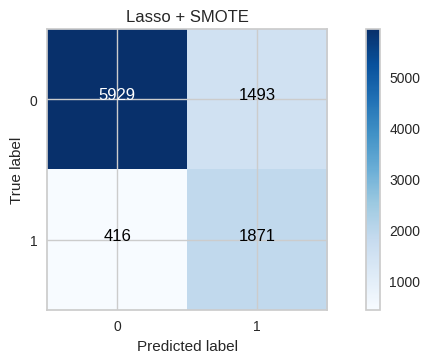

In [34]:
##  lasso + SMOTE
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, 'Lasso + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

ElasticNet + SMOTE

Matrice de confusion:
[[5936 1486]
 [ 415 1872]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      7422
           1       0.56      0.82      0.66      2287

    accuracy                           0.80      9709
   macro avg       0.75      0.81      0.76      9709
weighted avg       0.85      0.80      0.82      9709
 

Exactitude: 80.420229 



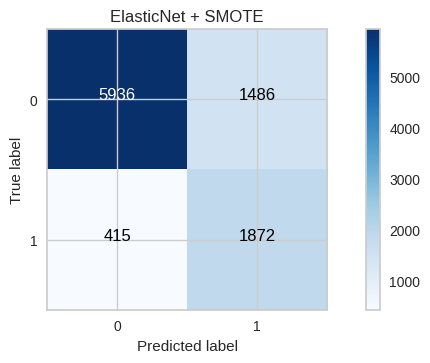

In [35]:
##  ElasticNet + SMOTE
logregElasticNet.fit(X_train_up, y_train_up)
y_pred = logregElasticNet.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, 'ElasticNet + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

En sur-echantillant la classe minoritaire, le f1_score de la classe 1 augmente  legerement et celui du classe 0 diminue legerement

# Optimisation des hyper-parametres avec Grid Search

## Lasso

In [36]:
logregLasso

LogisticRegression(C=0.1, penalty='l1', random_state=7, solver='liblinear',
                   tol=1e-05)

In [37]:
param_grid = {'C': [0.001, 0.01, 0.1, 1., 10.], 'max_iter': [100, 200, 300]}
grid = GridSearchCV(logregLasso, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
grid.fit(X_train_up, y_train_up)

GridSearchCV(estimator=LogisticRegression(C=0.1, penalty='l1', random_state=7,
                                          solver='liblinear', tol=1e-05),
             n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300]},
             return_train_score=True, scoring='f1', verbose=False)

In [38]:
grid.best_params_

{'C': 1.0, 'max_iter': 100}

les meilleurs parametres trouvés : {'C': 1.0, 'max_iter': 100}

In [39]:
grid_Lasso = grid.best_estimator_
grid_Lasso_fitted = grid_Lasso.fit(X_train, y_train)
grid_Lasso

LogisticRegression(penalty='l1', random_state=7, solver='liblinear', tol=1e-05)

In [40]:
grid_Lasso_fitted = grid_Lasso.fit(X_train, y_train)

In [41]:
# Sauvegardez le modèle dans un fichier apres entrainement
joblib.dump(grid_Lasso_fitted, '../models/grid_Lasso.pkl')

['../models/grid_Lasso.pkl']

In [42]:
grid_Lasso_fitted.score(X_train, y_train)

0.85119093601133

Lasso + GridSearch

Matrice de confusion:
[[6927  495]
 [ 988 1299]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.72      0.57      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.725512 



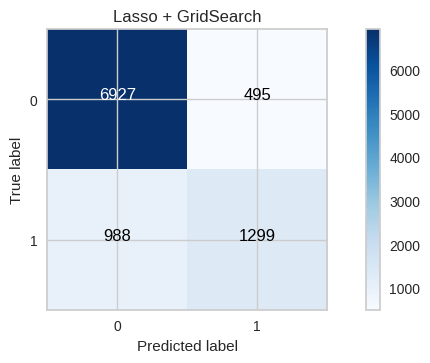

In [43]:
# performance de régression logistique Lasso avec GridSearchCV
y_pred = grid_Lasso_fitted.predict(X_test)
plot_confusion_matrix_sns(y_test, y_pred, 'Lasso + GridSearch') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

### Courbe de validation (Lasso)

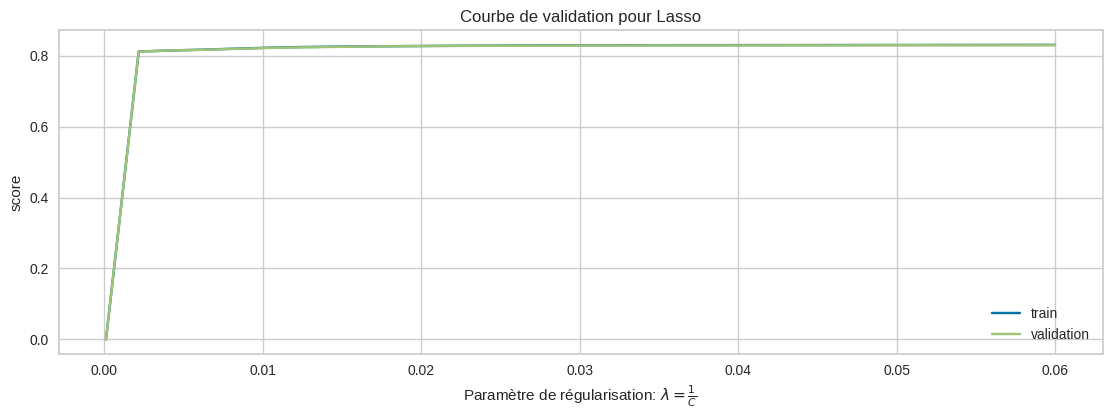

In [44]:
list_hyperparams = np.linspace(0.0001, 0.06, 30)

train_score, val_score = validation_curve(logregLasso,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour Lasso")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

Le score augmente très lègerement pour les deux dataset à partir de $\approx$ 0.0025 de lambda . Le modèle Lasso est ajusté (pas de sur-apprentissage ni sous-apprentissage)

### Courbe d'apprentissage

In [45]:

def print_courbe_apprentissage(model, X_train_up, y_train_up, model_name): 
    N, train_score, val_score = learning_curve(model, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.title("Courbe d'apprentissage pour "+ model_name)

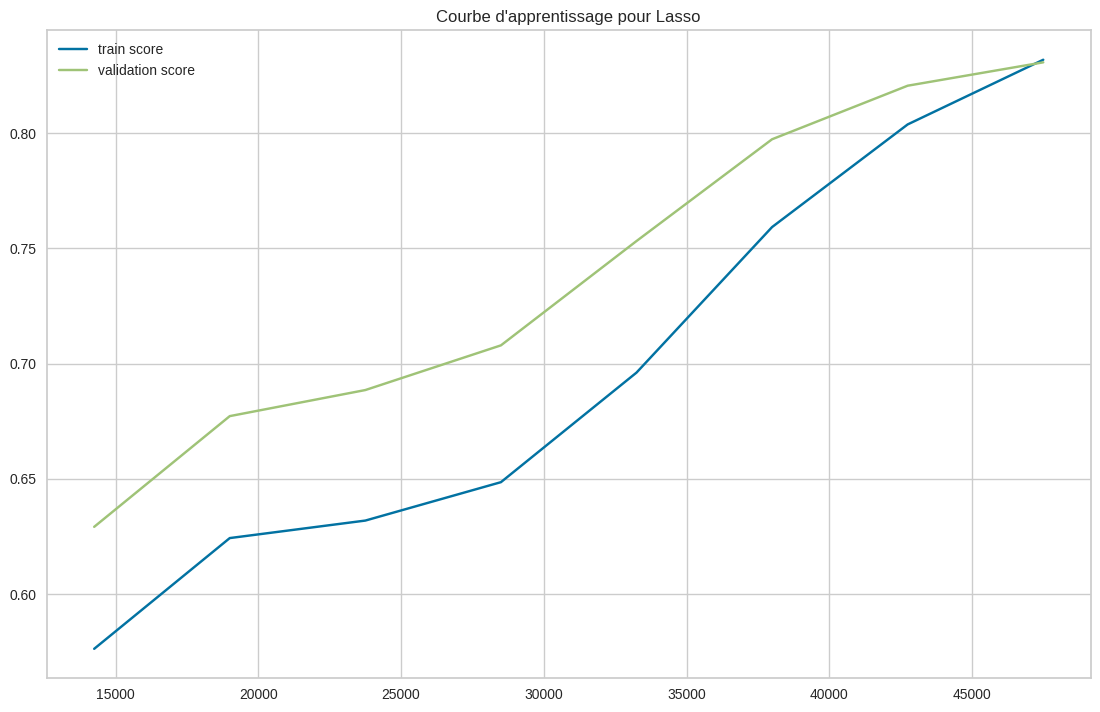

In [46]:
print_courbe_apprentissage(grid_Lasso, X_train_up, y_train_up, "Lasso")

Le modèle Lasso (avec les meilleurs paramètres trouvés par GridSearchCV) montre des signes de surapprentissage (overfitting). Le score de test est inférieur au score d'entraînement. Cependant, à la fin des courbes d'apprentissage, il y a un chevauchement, ce qui suggère que si nous avions plus de 45 000 données, nous pourrions peut etre obtenir un modèle mieux ajusté et moins en surapprentissage.

## Ridge

In [47]:
logregRidge

LogisticRegression(C=0.1, random_state=7, tol=1e-05)

In [48]:
def best_param_grid_search(model, X_train_up,y_train_up, X_train, y_train, model_name): 
    param_grid = {'C': [0.001, 0.01, 0.1, 1., 10.], 'max_iter': [100, 200, 300]}
    grid = GridSearchCV(model, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
    grid.fit(X_train_up, y_train_up)
    print("meilleur parametres : ",grid.best_params_)
    grid_model= grid.best_estimator_
    grid_model_fitted = grid_model.fit(X_train, y_train)
    # Sauvegardez le modèle dans un fichier apres entrainement
    joblib.dump(grid_model_fitted, '../models/'+model_name+'_fitted.pkl')
    
    return grid_model,grid_model_fitted
    
grid_Ridge, grid_Ridge_fitted = best_param_grid_search(logregRidge, X_train_up,y_train_up, X_train, y_train, 'grid_Ridge')

meilleur parametres :  {'C': 10.0, 'max_iter': 100}


Les meilleurs parametres trouvés : {'C': 10.0, 'max_iter': 100}

Ridge + GridSearch

Matrice de confusion:
[[6927  495]
 [ 988 1299]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.72      0.57      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.725512 



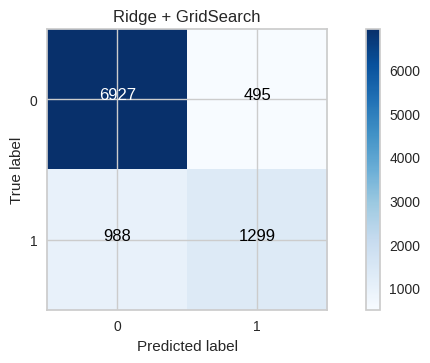

In [49]:
plot_confusion_matrix_sns(y_test, y_pred, 'Ridge + GridSearch')

### Courbe de validation

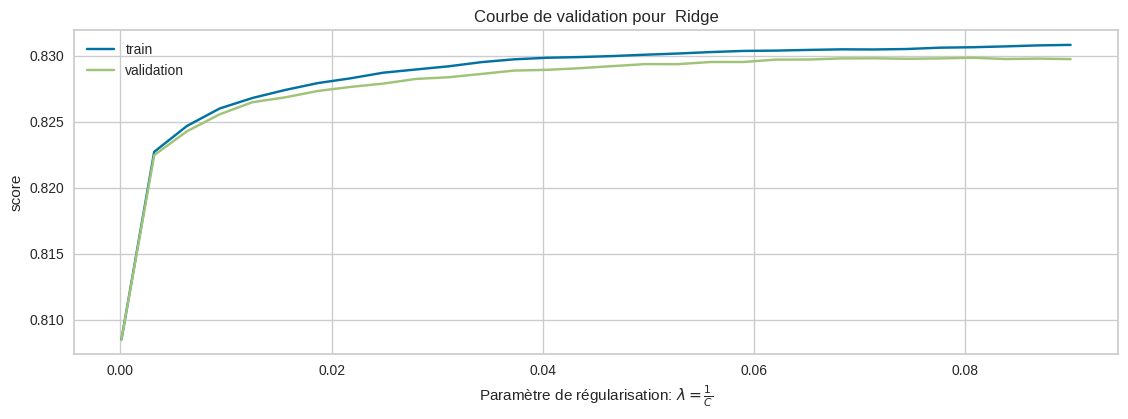

In [50]:
def print_score_validation(model, X_train_up, y_train_up, list_hyperparams, model_name):
    list_hyperparams = np.linspace(0.0001, 0.09, 30)
    train_score, val_score = validation_curve(model,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

    plt.figure(figsize=(12, 4))
    plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
    plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
    plt.legend()
    plt.title("Courbe de validation pour " + model_name)
    plt.ylabel('score')
    plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
    plt.show()
    
print_score_validation(logregRidge, X_train_up, y_train_up, list_hyperparams,' Ridge')

Le score de train est legerement superieur du celui de validation (sous apprentissage). Cependant le score de Ridge en train et test set sont légèrement supérieur à ceux de Lasso (score_Lasso $\approx 0.81$ et score_Ridge $\approx 0.83$) pour lambda 0.02 et 0.08

### Courbe d'apprentissage

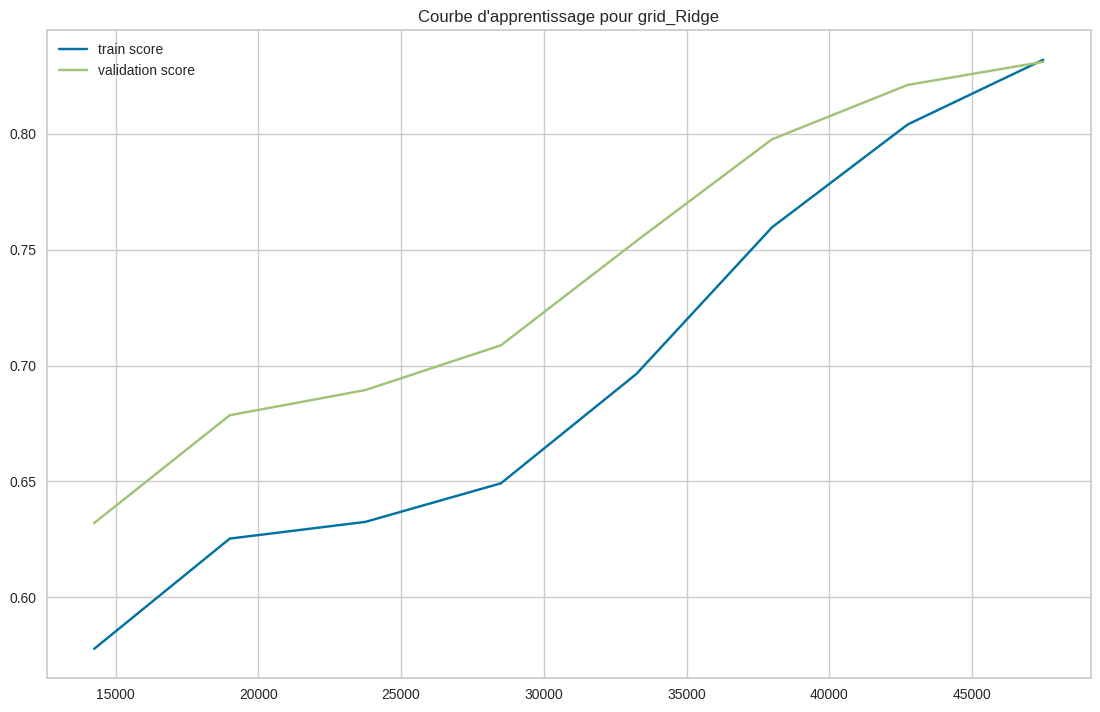

In [51]:
print_courbe_apprentissage(grid_Ridge, X_train_up, y_train_up, "grid_Ridge")

Même interpretation que celui du graphe Lasso : Le modèle Ridge (avec les meilleurs paramètres trouvés par GridSearchCV) montre des signes de surapprentissage (overfitting). Le score de test est inférieur au score d'entraînement. Cependant, à la fin des courbes d'apprentissage, il y a un chevauchement, ce qui suggère que si nous avions plus de 45 000 données, nous pourrions peut etre obtenir un modèle mieux ajusté et moins en surapprentissage.

## ElasticNet

In [57]:
logregElasticNet

LogisticRegression(C=0.1, l1_ratio=0.7, penalty='elasticnet', random_state=7,
                   solver='saga', tol=1e-05)

In [59]:
grid_EN, grid_EN_fitted = best_param_grid_search(logregElasticNet, X_train_up,y_train_up, X_train, y_train, 'grid_ElasticNet')

meilleur parametres :  {'C': 1.0, 'max_iter': 100}


meilleur performance : {'C': 1.0, 'max_iter': 100}

ElasticNet + GridSearch

Matrice de confusion:
[[6927  495]
 [ 988 1299]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.72      0.57      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.725512 



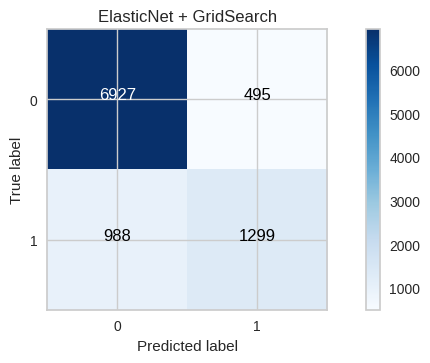

In [ ]:
plot_confusion_matrix_sns(y_test, y_pred, 'ElasticNet + GridSearch')

### Courbe de validation 

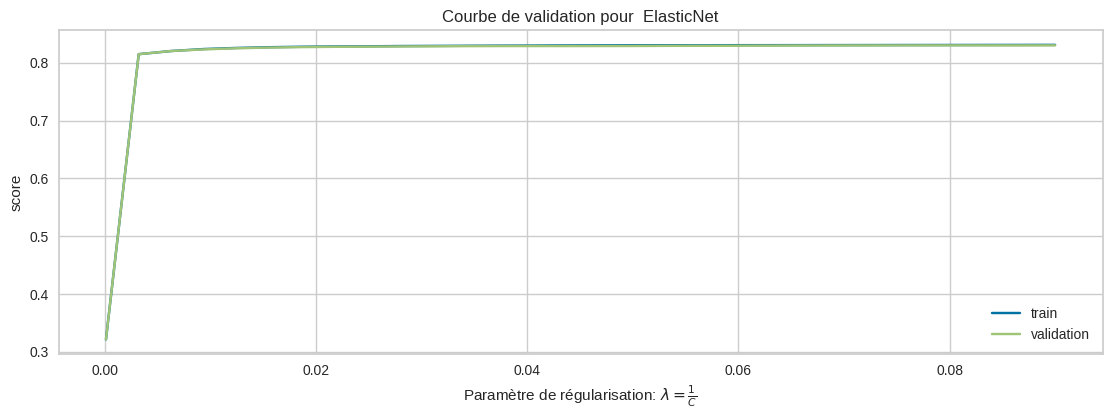

In [ ]:
def print_score_validation(model, X_train_up, y_train_up, list_hyperparams, model_name):
    list_hyperparams = np.linspace(0.0001, 0.09, 30)
    train_score, val_score = validation_curve(model,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

    plt.figure(figsize=(12, 4))
    plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
    plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
    plt.legend()
    plt.title("Courbe de validation pour " + model_name)
    plt.ylabel('score')
    plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
    plt.show()
    
print_score_validation(logregElasticNet, X_train_up, y_train_up, list_hyperparams,' ElasticNet')

Même interprétation que modèle Lasso

### Courbe d'apprentissage

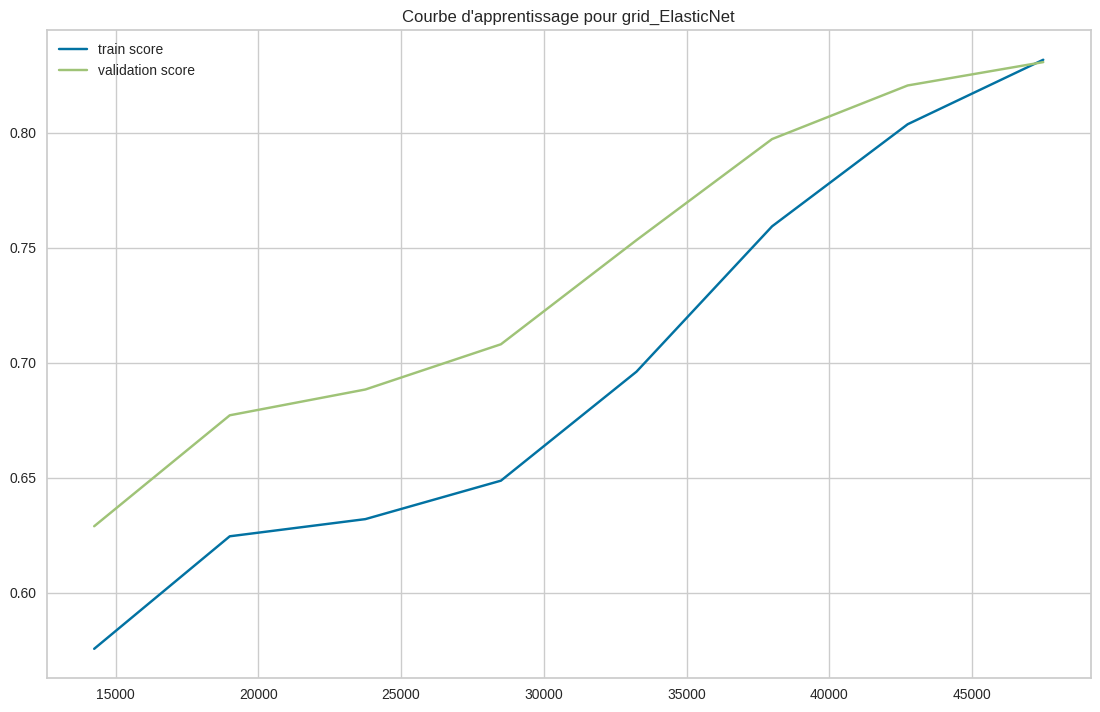

In [ ]:
print_courbe_apprentissage(grid_EN, X_train_up, y_train_up, "grid_ElasticNet")

Même interprétation que les deux premières models (Lasso et Ridge). Modèle en sur apprentissage

# Pipeline

In [ ]:
cat_features = get_cat_features(df)
cont_features = get_cont_features(df)

In [ ]:
# Imputation et Normalisation
catgoricalPipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
    )

continuousPipeline = make_pipeline(
    StandardScaler()
)

preprocessor = make_column_transformer(
    (catgoricalPipeline, cat_features),
    (continuousPipeline, cont_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))])

In [ ]:

lasso_pipe = make_pipeline(preprocessor, grid_Lasso)
lasso_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(penalty='l1', random_state=7,
                                    solver='liblinear', tol=1e-05))])

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Now Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married,Prof-specialty,Married,Black,Female,0,0,40,Other,0


In [ ]:
df_train_pip, df_test_pip = seperate_train_test(df, random_state=42)

y_train_pip = df_train_pip['>50K'].values
y_test_pip = df_test_pip['>50K'].values

lasso_pipe.fit(df_train_pip, y_train_pip)

# Utiliser le meilleur modèle pour prédire sur les données de test
y_pred_pip = lasso_pipe.predict(df_test_pip)

Lasso (pipeline 1)

Matrice de confusion:
[[6926  496]
 [ 987 1300]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.72      0.57      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.725512 



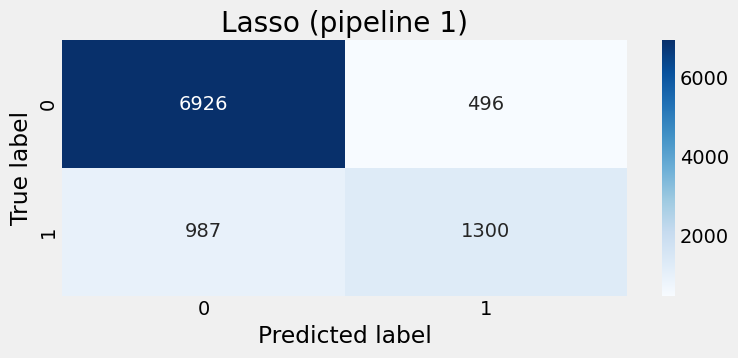

In [ ]:
plot_confusion_matrix_sns(y_test_pip, y_pred_pip, 'Lasso (pipeline 1)')